# Secretory Reactions
Here we will map all the secretory reactions from the [Mammalian Secretory Pathway Reconstruction paper](https://www.nature.com/articles/s41467-019-13867-y) to the genes in our reconstruction.

1. Load Secretory Pathway Reactions

In [1]:
import re
import pandas as pd
import numpy as np
from google_sheet import GoogleSheet

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from cobra.io import load_json_model
from cobra import Model, Reaction, Metabolite

In [2]:
import importlib
import iCHOSEC_Builder

from iCHOSEC_Builder import iCHOSEC_Builder

In [3]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
Sec_Recon_SPREADSHEET_ID = '1DaAdZlvMYDqb7g31I5dw-ZCZH52Xj_W3FnQMFUzqmiQ'

# Initialize the GoogleSheet object
sec_recon_gsheet_file = GoogleSheet(Sec_Recon_SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from SecRecon
sec_reactions_sheet = 'Reactions'
sec_reactions = sec_recon_gsheet_file.read_google_sheet(sec_reactions_sheet)

In [4]:
# Load model
model = load_json_model('Models/iCHO3595.json')

In [5]:
# Sec Recon Reaction Files
rxnFormula = list(sec_reactions['Reaction Formula'])
rxnAbbreviation = list(sec_reactions['Reaction'])
rxnPathway = list(sec_reactions['Pathway'])
rxnConditions = list(sec_reactions['Conditions'])
rxnGPR = list(sec_reactions['GPR_final'])
rxnGPR = ['' if x is None else x for x in rxnGPR] # transform None values to empty string
rxnComponents = list(sec_reactions['Components'])

# CHO PSIM
PSIM = pd.read_csv('PSIM/PSIM_CHO.tab', sep='\t')
PSIM.fillna({'Location': ''}, inplace=True) # Replace NaN values in the 'Location' column with empty strings
PSIM.set_index('Entry', inplace=True)

In [6]:
# Define the entry ID you are looking for
entryID = 'G3HGQ6'

# Create the Protein Specific Information (PSI) list
PSI = PSIM.loc[entryID]

In [7]:
#importlib.reload(iCHOSEC_Builder)
from iCHOSEC_Builder import iCHOSEC_Builder

builder = iCHOSEC_Builder(PSIM=PSIM,
                          entryID=entryID,
                          rxnPathway=rxnPathway,
                          rxnFormula=rxnFormula,
                          rxnAbbreviation=rxnAbbreviation,
                          rxnConditions=rxnConditions,
                          rxnGPR=rxnGPR,
                          rxnComponents = rxnComponents
                         )


            Protein: Plasminogen
            Length: 697.0
            MW: 78033.0
            Signal Peptide: 1
            Disulfide Bonds: 4
            


In [8]:
# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
rxns, rxnNames, GPRs = builder.generateProteinSpecificRxns_A()

In [9]:
rxns

['1393 h2o_c + 698 atp_c + 1392 gtp_c + 56 gly_c + 35 ala_L_c + 43 val_L_c + 43 leu_L_c + 25 ile_L_c + 13 met_L_c + 16 trp_L_c + 20 phe_L_c + 53 pro_L_c + 49 ser_L_c + 42 thr_L_c + 38 cys_L_c + 28 tyr_L_c + 31 asn_L_c + 30 gln_L_c + 43 glu_L_c + 34 asp_L_c + 46 lys_L_c + 38 arg_L_c + 14 his_L_c --> 1393 h_c + 697 amp_c + adp_c + 1393 pi_c + 1392 gdp_c + 697 ppi_c + G3HGQ6_c',
 'G3HGQ6_c + SRP_c --> G3HGQ6-SRP_c',
 'G3HGQ6-SRP_c + SRPR_r + RRBP1_r --> G3HGQ6-SRP-SRPR-RRBP1_c',
 'RRBP1_r <=>',
 'G3HGQ6-SRP-SRPR-RRBP1_c + SEC61C_r + 2 gtp_c --> G3HGQ6-SRP-SRPR-SEC61C_c + RRBP1_r',
 'G3HGQ6-SRP-SRPR-SEC61C_c + 2 h2o_c --> G3HGQ6-SEC61C_c + SRP14_c + SRP19_c + SRP54_c + SRP68_c + SRP72_c + SRPRA_r + SRPRB_r + 2 gdp_c + 2 pi_c + 2 h_c',
 'G3HGQ6-SEC61C_c + SPC_r + h2o_r --> G3HGQ6-SEC61-SPC_r + G3HGQ6-sp_r',
 'G3HGQ6-SEC61-SPC_r + SEC62_r + SEC63_r + TRAM1_r + TRAP_r + DNAJC1_r + SERP1_r + 17.425 BiP-adp_r --> G3HGQ6-BiP-adp_r + Translocase_r + SPC_r',
 'SEC62_r <=>',
 'SEC63_r <=>',
 'TRAM1

In [ ]:
import iCHO2048s_Builder
import cobra
model = cobra.io.load_matlab_model('iCHOv1.mat')
entryID = 'G3HGQ6'
# Generate lists for reactions (rxns), reaction names (rxnNames), and Gene-Protein-Reactions (GPRs)
[rxns, rxnNames, GPRs] = iCHO2048s_Builder.generateProteinSpecificRxns_A(entryID)

In [10]:
sec_reactions_dict = {}
for name, rxn, gpr in zip(rxnNames, rxns, GPRs):
    sec_reactions_dict[name] = {'rxn': rxn, 'GPR': gpr}

In [11]:
sec_reactions_dict

{'G3HGQ6_TRANSLATION_protein': {'rxn': '1393 h2o_c + 698 atp_c + 1392 gtp_c + 56 gly_c + 35 ala_L_c + 43 val_L_c + 43 leu_L_c + 25 ile_L_c + 13 met_L_c + 16 trp_L_c + 20 phe_L_c + 53 pro_L_c + 49 ser_L_c + 42 thr_L_c + 38 cys_L_c + 28 tyr_L_c + 31 asn_L_c + 30 gln_L_c + 43 glu_L_c + 34 asp_L_c + 46 lys_L_c + 38 arg_L_c + 14 his_L_c --> 1393 h_c + 697 amp_c + adp_c + 1393 pi_c + 1392 gdp_c + 697 ppi_c + G3HGQ6_c',
  'GPR': ''},
 'G3HGQ6_co_TRANSLOC_1': {'rxn': 'G3HGQ6_c + SRP_c --> G3HGQ6-SRP_c',
  'GPR': '100761457 and 100753807 and 100756776 and 100760316 and 100760440'},
 'G3HGQ6_co_TRANSLOC_2': {'rxn': 'G3HGQ6-SRP_c + SRPR_r + RRBP1_r --> G3HGQ6-SRP-SRPR-RRBP1_c',
  'GPR': '100761457 and 100753807 and 100756776 and 100760316 and 100760440 and 100758562 and 100767241 and 100768883'},
 'SK_RRBP1_r': {'rxn': 'RRBP1_r <=>', 'GPR': ''},
 'G3HGQ6_co_TRANSLOC_3': {'rxn': 'G3HGQ6-SRP-SRPR-RRBP1_c + SEC61C_r + 2 gtp_c --> G3HGQ6-SRP-SRPR-SEC61C_c + RRBP1_r',
  'GPR': '100761457 and 100753807

In [12]:
# Initialize new model
secretory_model = model.copy()

# Add Sec Recon Reactions IDs
sec_r = []
for rxn in sec_reactions_dict.keys():
    r = Reaction(rxn.strip())
    sec_r.append(r)
secretory_model.add_reactions(sec_r)

for r in secretory_model.reactions:
    if r in sec_r:
        r.build_reaction_from_string(sec_reactions_dict[r.id]['rxn'])
        r.gene_reaction_rule = str(sec_reactions_dict[r.id]['GPR'])
        print(r.reaction)
        print(f"Lower bound: {r.lower_bound}, Upper bound: {r.upper_bound}")

unknown metabolite 'G3HGQ6_c' created
35.0 ala_L_c + 38.0 arg_L_c + 31.0 asn_L_c + 34.0 asp_L_c + 698.0 atp_c + 38.0 cys_L_c + 30.0 gln_L_c + 43.0 glu_L_c + 56.0 gly_c + 1392.0 gtp_c + 1393.0 h2o_c + 14.0 his_L_c + 25.0 ile_L_c + 43.0 leu_L_c + 46.0 lys_L_c + 13.0 met_L_c + 20.0 phe_L_c + 53.0 pro_L_c + 49.0 ser_L_c + 42.0 thr_L_c + 16.0 trp_L_c + 28.0 tyr_L_c + 43.0 val_L_c --> G3HGQ6_c + adp_c + 697.0 amp_c + 1392.0 gdp_c + 1393.0 h_c + 1393.0 pi_c + 697.0 ppi_c
Lower bound: 0, Upper bound: 1000.0
unknown metabolite 'SRP_c' created
unknown metabolite 'G3HGQ6-SRP_c' created
G3HGQ6_c + SRP_c --> G3HGQ6-SRP_c
Lower bound: 0, Upper bound: 1000.0
unknown metabolite 'SRPR_r' created
unknown metabolite 'RRBP1_r' created
unknown metabolite 'G3HGQ6-SRP-SRPR-RRBP1_c' created
G3HGQ6-SRP_c + RRBP1_r + SRPR_r --> G3HGQ6-SRP-SRPR-RRBP1_c
Lower bound: 0, Upper bound: 1000.0
RRBP1_r <=> 
Lower bound: -1000.0, Upper bound: 1000.0
unknown metabolite 'SEC61C_r' created
unknown metabolite 'G3HGQ6-SRP-SR

In [13]:
secretory_model.metabolites.get_by_id('SRP14_c')

Metabolite identifier,SRP14_c
Name,
Memory address,0x175f95b90
Formula,None
Compartment,None
In 3 reaction(s),"G3HGQ6_co_TRANSLOC_4, SK_SRP14_c, SRP"


In [14]:
secretory_model.reactions.SRP

Reaction identifier,SRP
Name,
Memory address,0x175ed4ad0
Stoichiometry,SRP14_c + SRP19_c + SRP54_c + SRP68_c + SRP72_c --> SRP_c + + + + -->
GPR,100761457 and 100753807 and 100756776 and 100760316 and 100760440
Lower bound,0
Upper bound,1000.0


In [25]:
# Set the objective to secretion of target protein
sreaction = Reaction('DM_G3HGQ6-SEC61C_c')
secretory_model.add_reactions([sreaction])
sreaction.name = 'Demand for G3HGQ6-SEC61C_c '
sreaction.lower_bound = 0.
sreaction.upper_bound = 1000.
sreaction.build_reaction_from_string('G3HGQ6-SEC61C_c -->')
secretory_model.add_reactions([sreaction])

Ignoring reaction 'DM_G3HGQ6-SEC61C_c' since it already exists.
/Users/pablodigiusto/miniforge3/envs/secrecon2.0/lib/python3.11/site-packages/cobra/core/reaction.py:1567: UserWarning: no model found
  warn("no model found")


AttributeError: 'NoneType' object has no attribute 'metabolites'

In [32]:
secretory_model.objective = entryID + '_Final_demand'
secretory_model.slim_optimize() # mmol of target protein/gDW/h

0.0

Text(0.5, 1.0, 'Productivity-for-growth trade-off')

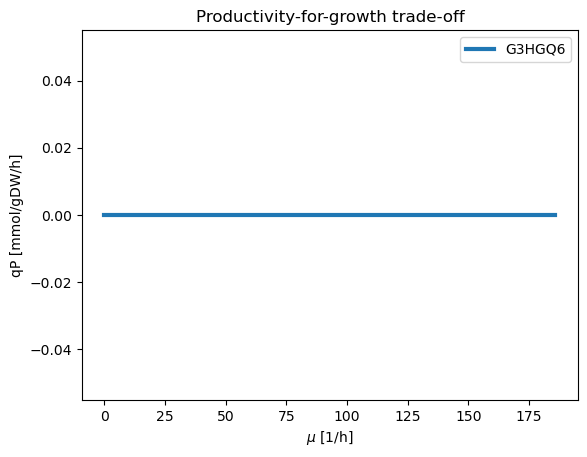

In [31]:

# Plot Pareto frontier of secretion-for-growth trade-off
secretory_model.objective = 'biomass_cho_prod'
max_growth = secretory_model.slim_optimize()
secretory_model.objective = entryID + '_Final_demand'
steps = 50
x = [max_growth/steps * i for i in range(steps)]
y = [0] * len(x)
for n in range(steps):
    mu_constraint = x[n]
    secretory_model.reactions.get_by_id('biomass_cho_prod').lower_bound = mu_constraint
    y[n] = secretory_model.slim_optimize()
plt.plot(x,y,linewidth=3,label=entryID)
plt.legend()
plt.xlabel('$\mu$ [1/h]')
plt.ylabel('qP [mmol/gDW/h]')
plt.title('Productivity-for-growth trade-off')